In [2]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

In [4]:
nc.variables

OrderedDict([('time', <scipy.io.netcdf.netcdf_variable at 0x1fa66b54f08>),
             ('time_bnds', <scipy.io.netcdf.netcdf_variable at 0x1fa66b62048>),
             ('longitude', <scipy.io.netcdf.netcdf_variable at 0x1fa66b54fc8>),
             ('latitude', <scipy.io.netcdf.netcdf_variable at 0x1fa66b62208>),
             ('level', <scipy.io.netcdf.netcdf_variable at 0x1fa66b623c8>),
             ('u', <scipy.io.netcdf.netcdf_variable at 0x1fa66b625c8>)])

In [5]:
nc.dimensions

OrderedDict([('time', None),
             ('bnds', 2),
             ('longitude', 512),
             ('latitude', 256),
             ('level', 37)])

In [6]:
times = nc.variables["time"]
u = nc.variables["u"]

In [7]:
u.shape

(12, 37, 256, 512)

In [8]:
times.shape

(12,)

In [9]:
u[0, 0, 0, 0]

-34.00075

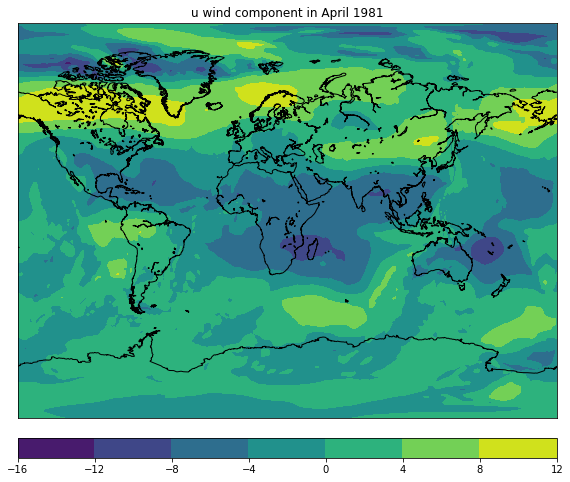

In [10]:
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=30,resolution='l')
m.drawcoastlines()

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, u[4,-1,:,:]) # variate 2nd dimension for different altitudes, -1 is ground level
cbar = m.colorbar(cs,location='bottom',pad="5%")
plt.title("u wind component in April 1981")
plt.show()

<h2>Plotting the u wind component for every month in 1981</h2>

In [11]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]


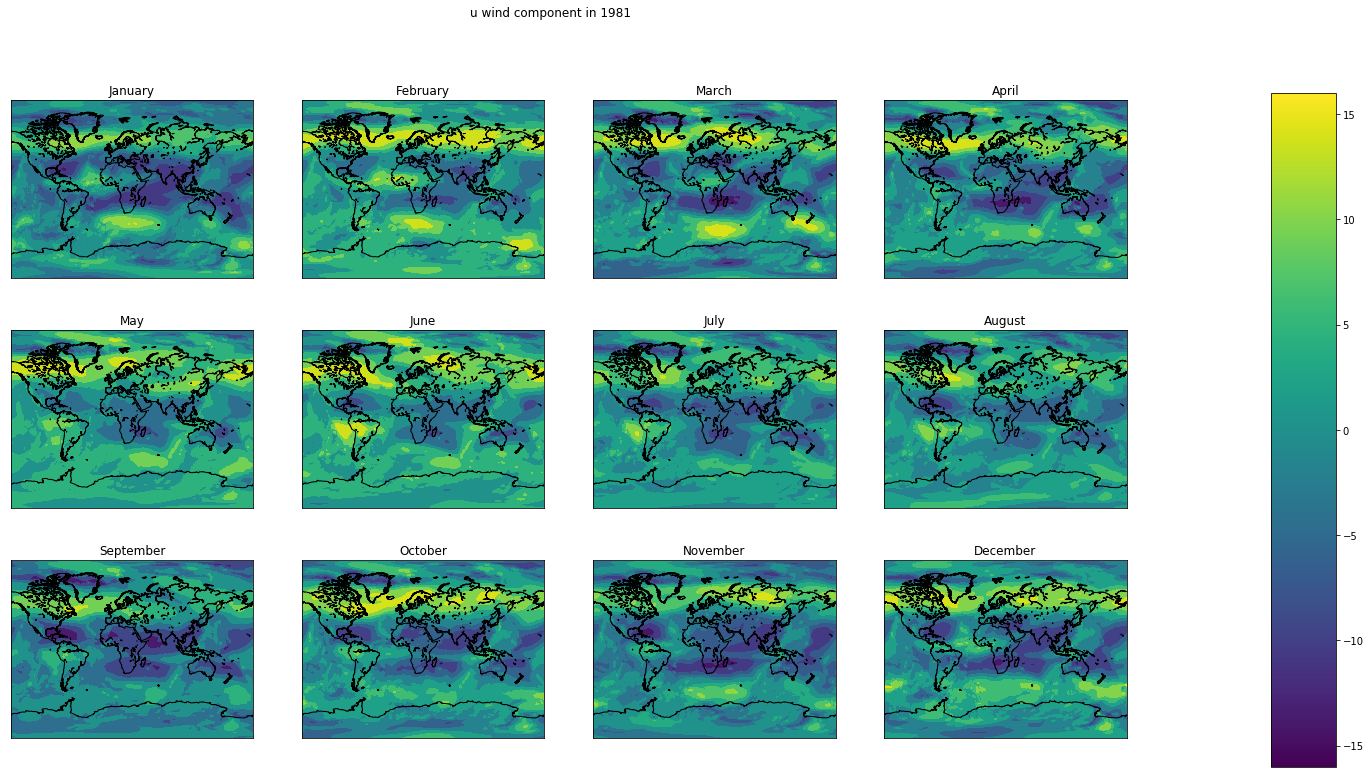

In [16]:
norm = matplotlib.colors.Normalize(vmin=-16, vmax=16, clip=True)
mapper= matplotlib.cm.ScalarMappable(norm=norm)

fig, axes =plt.subplots(figsize = (20,12), nrows=3, ncols=4)

for i, ax in enumerate(axes.flat):
    m = Basemap(projection='mill',lon_0=30,resolution='l', ax=ax)
    m.drawcoastlines()

    lons, lats = m.makegrid(512, 256)
    x, y = m(lons, lats)

    cs = m.contourf(x, y, u[i, -1, :, :]) # variate 2nd dimension for different altitudes, -1 is ground level
    ax.set_title(months[i])
    
fig.suptitle("u wind component in 1981")
plt.colorbar(mapper, cax=plt.axes([1, 0.1, 0.045, 0.78]))
plt.show()

<h2>Plotting the u wind component for different levels in February 1981</h2>

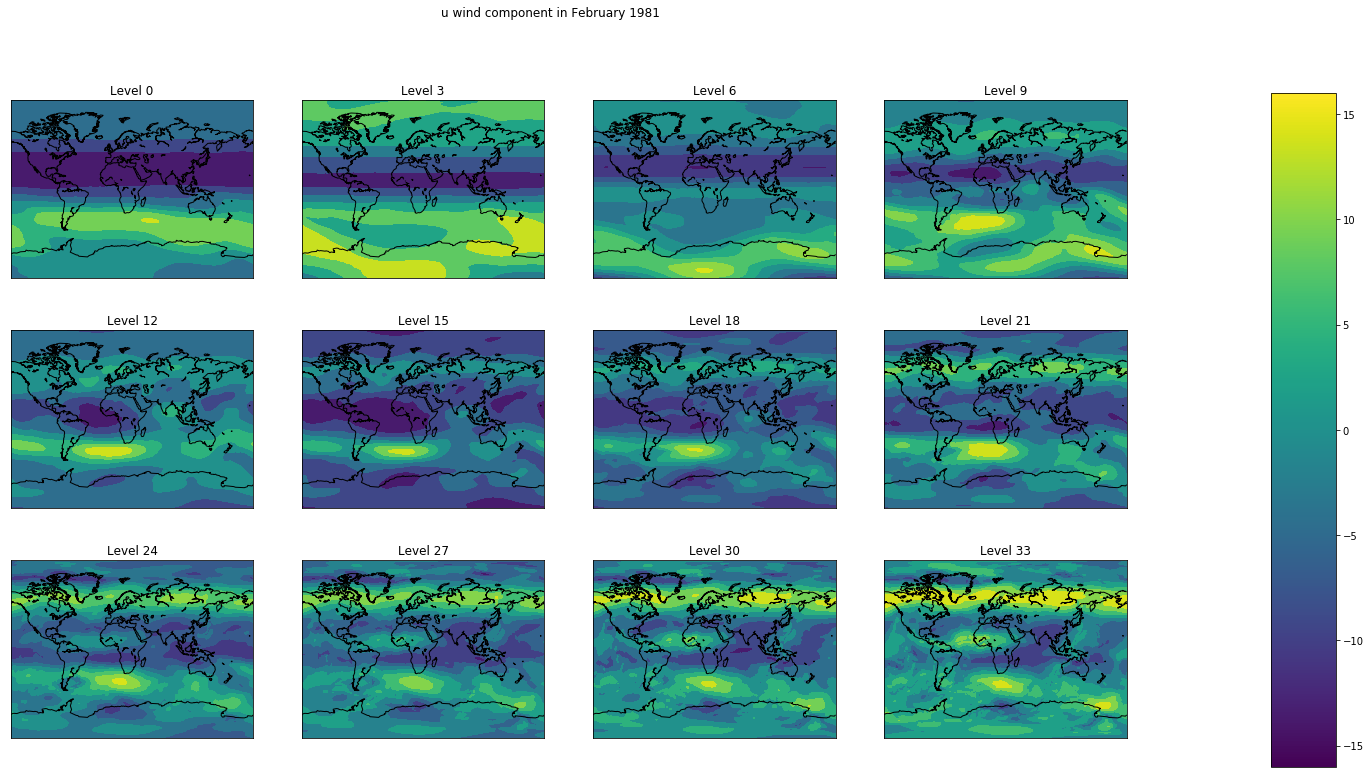

In [17]:
fig, axes =plt.subplots(figsize = (20,12), nrows=3, ncols=4)

for i, ax in enumerate(axes.flat):
    level = i * 3
    m = Basemap(projection='mill',lon_0=30,resolution='c', ax=ax)
    m.drawcoastlines()

    lons, lats = m.makegrid(512, 256)
    x, y = m(lons, lats)

    cs = m.contourf(x, y, u[1, level, :, :]) # variate 2nd dimension for different altitudes, -1 is ground level
    ax.set_title("Level " + str(level))
    
fig.suptitle("u wind component for different levels in February 1981")
plt.colorbar(mapper, cax=plt.axes([1, 0.1, 0.045, 0.78]))
plt.show()